<a href="https://colab.research.google.com/github/SwaRna-777/Assignment1/blob/main/24_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Importing required Libraries


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import cv2
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


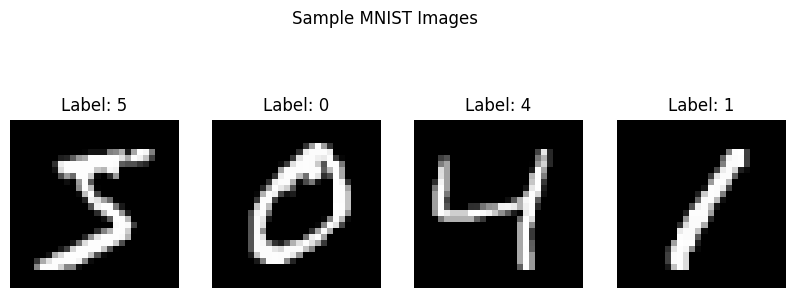

In [ ]:

# DATA LOADING & PREPROCESSING

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Display sample images
plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(x_train_full[i], cmap='gray')
    plt.title(f"Label: {y_train_full[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Images")
plt.show()

# Normalize pixel values
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train_full = x_train_full.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# One-hot encode labels
y_train_full = to_categorical(y_train_full, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
def build_cnn_model(activation, optimizer_name):

    optimizer_dict = {
        "adam": tf.keras.optimizers.Adam(),
        "sgd": tf.keras.optimizers.SGD(),
    }

    model = Sequential([
        Conv2D(32, (3,3), activation=activation,
               padding='same', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(64, (3,3), activation=activation,
               padding='same'),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Flatten(),

        Dense(128, activation=activation),
        Dropout(0.5),

        Dense(64, activation=activation),
        Dropout(0.3),

        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer_dict[optimizer_name],
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

Used only 15000 samples to find how the model is performing.**bold text**

In [ ]:

# ReLU vs Sigmoid (Adam & SGD)

np.random.seed(42)
indices = np.random.choice(len(x_train_full), 15000, replace=False)

x_train_fast = x_train_full[indices]
y_train_fast = y_train_full[indices]

results_part1 = []

activations_part1 = ["relu", "sigmoid","tanh"]
optimizers_part1 = ["adam", "sgd"]

epochs_list = [5,10]
batch_sizes = [128, 256]          # Larger batches

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True
)

for act in activations_part1:
    for opt in optimizers_part1:
        for ep in epochs_list:
            for batch in batch_sizes:

                print(f"{act.upper()} + {opt.upper()} | Epochs={ep} | Batch={batch}")

                model = build_cnn_model(act, opt)

                start_time = time.time()

                history = model.fit(
                    x_train_fast,
                    y_train_fast,
                    epochs=ep,
                    batch_size=batch,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=0
                )

                training_time = time.time() - start_time

                test_loss, test_accuracy = model.evaluate(
                    x_test, y_test_cat, verbose=0
                )

                results_part1.append([
                    act,
                    opt,
                    ep,
                    batch,
                    round(test_accuracy,4),
                    round(training_time,2)
                ])

df_part1 = pd.DataFrame(
    results_part1,
    columns=[
        "Activation",
        "Optimizer",
        "Epochs",
        "Batch Size",
        "Test Accuracy",
        "Training Time (s)"
    ]
)

print("\n===== FAST PART 1 RESULTS =====\n")
display(df_part1)

RELU + ADAM | Epochs=5 | Batch=128
RELU + ADAM | Epochs=5 | Batch=256
RELU + ADAM | Epochs=10 | Batch=128
RELU + ADAM | Epochs=10 | Batch=256
RELU + SGD | Epochs=5 | Batch=128
RELU + SGD | Epochs=5 | Batch=256
RELU + SGD | Epochs=10 | Batch=128
RELU + SGD | Epochs=10 | Batch=256
SIGMOID + ADAM | Epochs=5 | Batch=128
SIGMOID + ADAM | Epochs=5 | Batch=256
SIGMOID + ADAM | Epochs=10 | Batch=128
SIGMOID + ADAM | Epochs=10 | Batch=256
SIGMOID + SGD | Epochs=5 | Batch=128
SIGMOID + SGD | Epochs=5 | Batch=256
SIGMOID + SGD | Epochs=10 | Batch=128
SIGMOID + SGD | Epochs=10 | Batch=256
TANH + ADAM | Epochs=5 | Batch=128
TANH + ADAM | Epochs=5 | Batch=256
TANH + ADAM | Epochs=10 | Batch=128
TANH + ADAM | Epochs=10 | Batch=256
TANH + SGD | Epochs=5 | Batch=128
TANH + SGD | Epochs=5 | Batch=256
TANH + SGD | Epochs=10 | Batch=128
TANH + SGD | Epochs=10 | Batch=256

===== FAST PART 1 RESULTS =====



,Activation,Optimizer,Epochs,Batch Size,Test Accuracy,Training Time (s)
0,relu,adam,5,128,0.9736,13.85
1,relu,adam,5,256,0.9657,13.87
2,relu,adam,10,128,0.9822,15.89
3,relu,adam,10,256,0.9781,14.39
4,relu,sgd,5,128,0.7955,11.24
5,relu,sgd,5,256,0.5502,12.78
6,relu,sgd,10,128,0.8812,13.79
7,relu,sgd,10,256,0.7952,13.22
8,sigmoid,adam,5,128,0.1028,11.99
9,sigmoid,adam,5,256,0.1135,11.75


Visualization comprasion

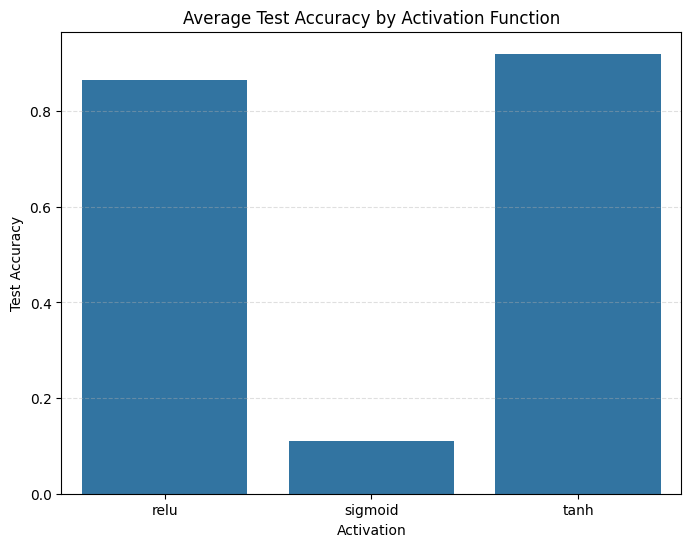

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.barplot(
    data=df_part1,
    x="Activation",
    y="Test Accuracy",
    ci=None
)

plt.ylabel("Test Accuracy")
plt.title("Average Test Accuracy by Activation Function")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

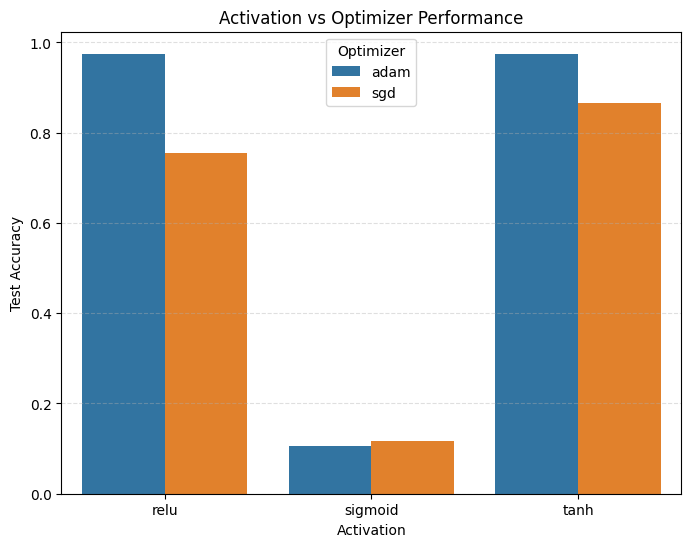

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(
    data=df_part1,
    x="Activation",
    y="Test Accuracy",
    hue="Optimizer",
    ci=None
)

plt.ylabel("Test Accuracy")
plt.title("Activation vs Optimizer Performance")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

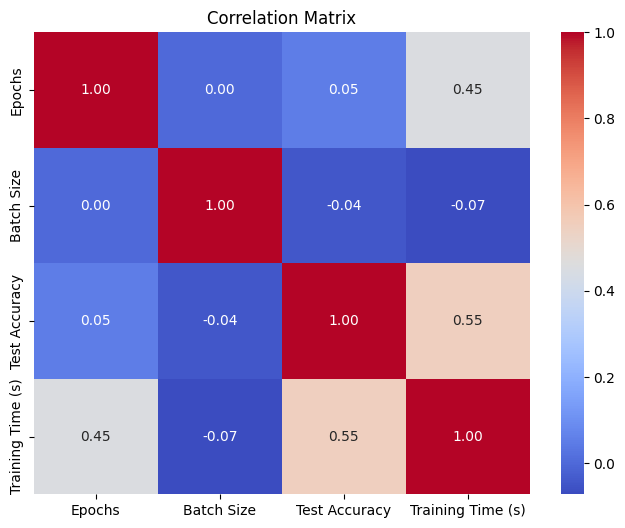

In [ ]:
plt.figure(figsize=(8,6))

numeric_df = df_part1.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


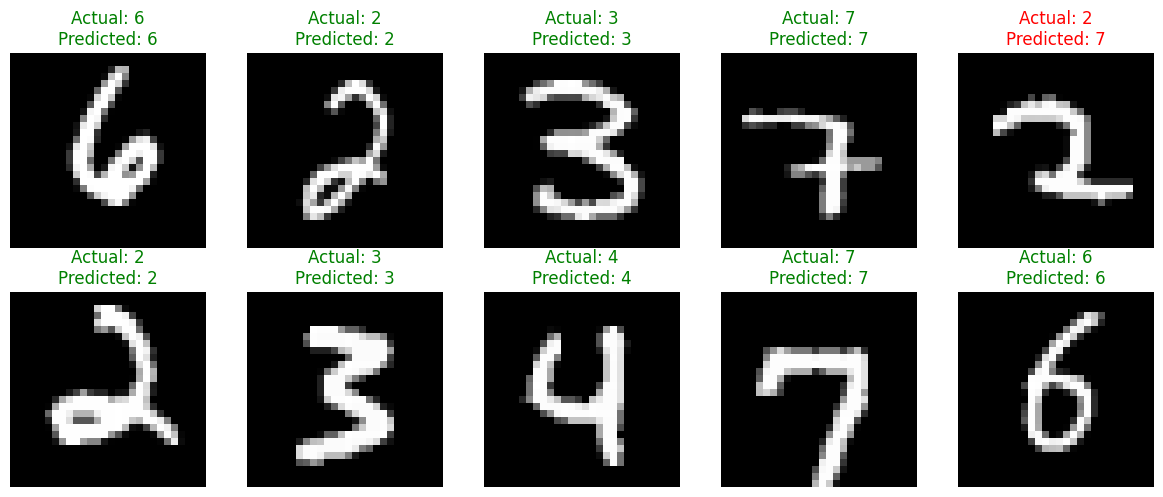

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select 10 test samples
np.random.seed(42)
random_indices = np.random.choice(len(x_test), 10, replace=False)

random_images = x_test[random_indices]
random_labels = y_test[random_indices]

# Make predictions
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot results
plt.figure(figsize=(12,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(random_images[i].reshape(28,28), cmap='gray')

    color = "green" if random_labels[i] == predicted_labels[i] else "red"

    plt.title(
        f"Actual: {random_labels[i]}\nPredicted: {predicted_labels[i]}",
        color=color
    )

    plt.axis('off')

plt.tight_layout()
plt.show()

Hand written sample testing

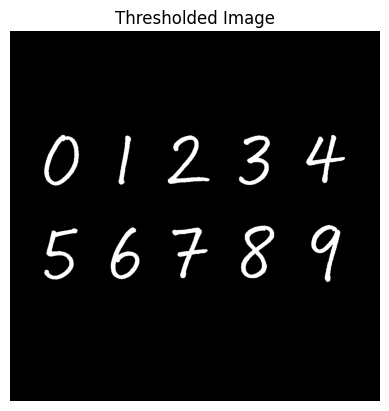

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("/content/hw.png")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Invert (MNIST has white digits on black)
gray = cv2.bitwise_not(gray)

# Apply threshold
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")
plt.show()

In [ ]:
contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

digits = []

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)

    # Filter small noise
    if w > 20 and h > 20:
        digit = thresh[y:y+h, x:x+w]

        # Resize to 28x28
        resized = cv2.resize(digit, (28,28))

        digits.append(resized)

# Sort left to right
digits = sorted(digits, key=lambda img: np.sum(img))

In [ ]:
processed_digits = np.array(digits)
processed_digits = processed_digits.reshape(-1,28,28,1)
processed_digits = processed_digits / 255.0

In [ ]:
model = build_cnn_model('relu', "adam")

model.fit(
    x_train_small,
    y_train_small,
    epochs=15,
    batch_size=128,
    verbose=1
)

# Make predictions on the processed_digits
predictions = model.predict(processed_digits)
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted Labels for processed digits:", predicted_labels)

Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.2688 - loss: 2.0280
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6289 - loss: 1.0813
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7978 - loss: 0.6409
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8630 - loss: 0.4658
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8875 - loss: 0.3600
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9143 - loss: 0.3104
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9189 - loss: 0.2751
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9278 - loss: 0.2458
Epoch 9/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9303 - loss: 0.2197
Epoch 10/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9412 - loss: 0.2008
Epoch 11/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9476 - loss: 0.1701
Epoch 12/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9479 - l

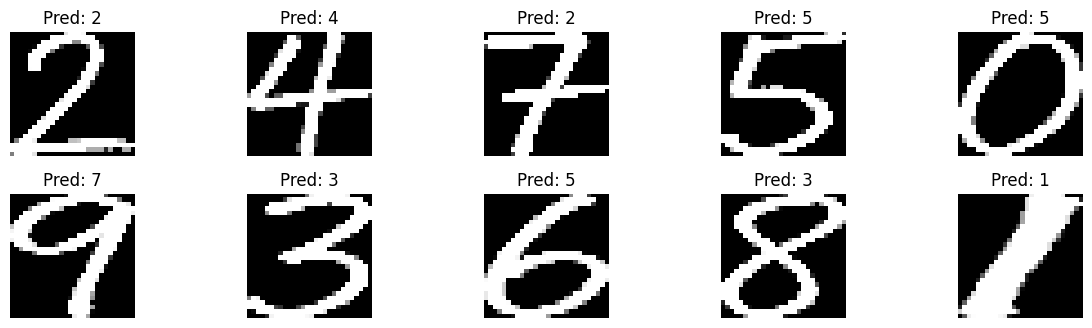

Predicted Labels for processed digits: [2 4 2 5 5 7 3 5 3 1]


In [ ]:
plt.figure(figsize=(12,5))

for i in range(len(processed_digits)):
    plt.subplot(3,5,i+1)
    plt.imshow(processed_digits[i].reshape(28,28), cmap='gray')

    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Predicted Labels for processed digits:", predicted_labels)

In [ ]:

model = build_cnn_model('sigmoid', "adam")


model.fit(
    x_train_small,
    y_train_small,
    epochs=15,
    batch_size=256,
    verbose=1
)

# Make predictions on the processed_digits
predictions = model.predict(processed_digits)
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted Labels for processed digits:", predicted_labels)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.1040 - loss: 2.4638
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0940 - loss: 2.3831
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0937 - loss: 2.3581
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0994 - loss: 2.3398
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0954 - loss: 2.3357
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0992 - loss: 2.3278
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0915 - loss: 2.3208
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0891 - loss: 2.3232
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0993 - loss: 2.3177
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0987 - loss: 2.3163
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0999 - loss: 2.3106
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1044 

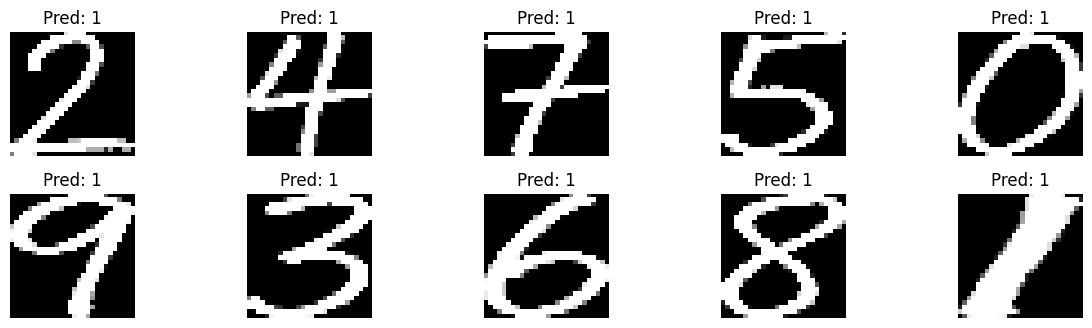

Predicted Labels for processed digits: [1 1 1 1 1 1 1 1 1 1]


In [ ]:
plt.figure(figsize=(12,5))

for i in range(len(processed_digits)):
    plt.subplot(3,5,i+1)
    plt.imshow(processed_digits[i].reshape(28,28), cmap='gray')

    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Predicted Labels for processed digits:", predicted_labels)

In [ ]:

model = build_cnn_model('tanh', "adam")


model.fit(
    x_train_small,
    y_train_small,
    epochs=15,
    batch_size=256,
    verbose=1
)

# Make predictions on the processed_digits
predictions = model.predict(processed_digits)
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted Labels for processed digits:", predicted_labels)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.3689 - loss: 1.8766
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7701 - loss: 0.7399
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8592 - loss: 0.4920
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8928 - loss: 0.3618
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9108 - loss: 0.2945
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9281 - loss: 0.2522
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9331 - loss: 0.2229
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9435 - loss: 0.1915
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9501 - loss: 0.1731
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9536 - loss: 0.1551
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9657 - loss: 0.1292
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9607

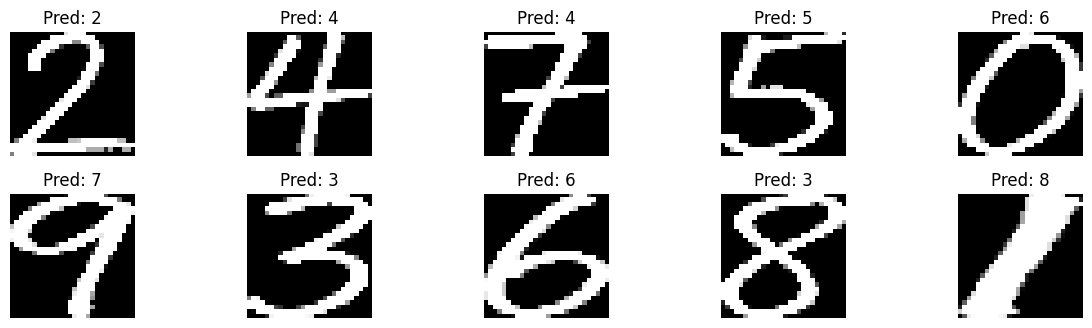

Predicted Labels for processed digits: [2 4 4 5 6 7 3 6 3 8]


In [ ]:
plt.figure(figsize=(12,5))

for i in range(len(processed_digits)):
    plt.subplot(3,5,i+1)
    plt.imshow(processed_digits[i].reshape(28,28), cmap='gray')

    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Predicted Labels for processed digits:", predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


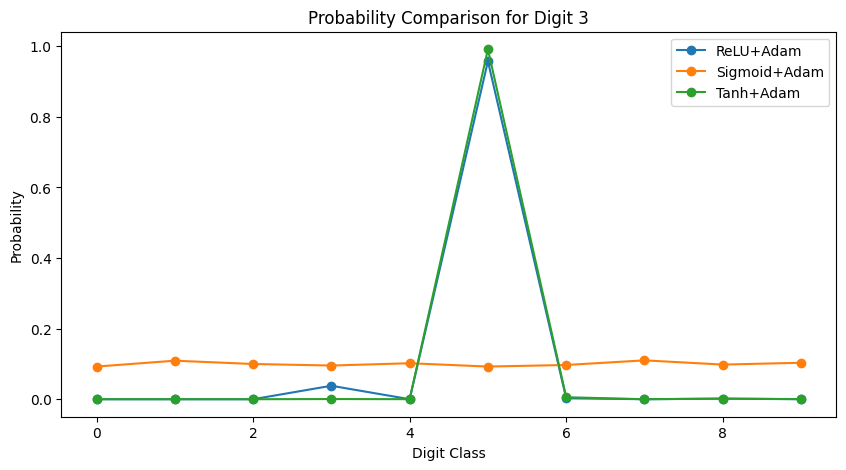

In [ ]:
digit_index = 3

plt.figure(figsize=(10,5))

for name, model in models_dict.items():
    probs = model.predict(processed_digits)
    plt.plot(probs[digit_index], marker='o', label=name)

plt.xlabel("Digit Class")
plt.ylabel("Probability")
plt.title(f"Probability Comparison for Digit {digit_index}")
plt.legend()
plt.show()